In [1]:
import torch
import time
from snn_delays.snn import SNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.train_utils import get_device, print_spike_info, propagate_batch, set_seed
from snn_delays.utils.visualization_utils import plot_raster
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Subset, DataLoader
from collections import OrderedDict
device = get_device()

# for reproducibility
set_seed(42)


c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on: cuda:0


In [2]:
dataset = 'shd'
total_time = 50
batch_size = 20

# DATASET
DL = DatasetLoader(dataset=dataset,
                  caching='memory',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time,
                  crop_to=1e6)

#### get the indexes for class 0,1, ... 19

train_dataset = DL._dataset.test_dataset
num_classes = DL._dataset.n_classes

class_indices = {}
for idx, (_, label) in enumerate(train_dataset):
    label = np.argmax(label)
    if label not in class_indices:
        class_indices[label] = []
    class_indices[label].append(idx)
    if len(class_indices) == num_classes:
        break
class_indices = dict(sorted(class_indices.items()))
sampled_indices = [np.random.choice(indices) for indices in class_indices.values()]

[CropTime(min=0, max=1000000.0), ToFrame(sensor_size=(700, 1, 1), time_window=None, event_count=None, n_time_bins=50, n_event_bins=None, overlap=0, include_incomplete=False)]


[CropTime(min=0, max=1000000.0), ToFrame(sensor_size=(700, 1, 1), time_window=None, event_count=None, n_time_bins=50, n_event_bins=None, overlap=0, include_incomplete=False)]

[INFO] Delays: tensor([0])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([0])

[INFO] Delays o: tensor([0])
1000.0
Delta t: 20.0 ms
mean of normal: -0.541324854612918
for input layer
total spikes: 104600.0
spikes per sample: 5230.0
spikes per timestep: 104.6 / 700
spikes per neuron: 7.47 / 50
spike density: 0.0029885714285714285
[0, 1, 2, 3, 4]


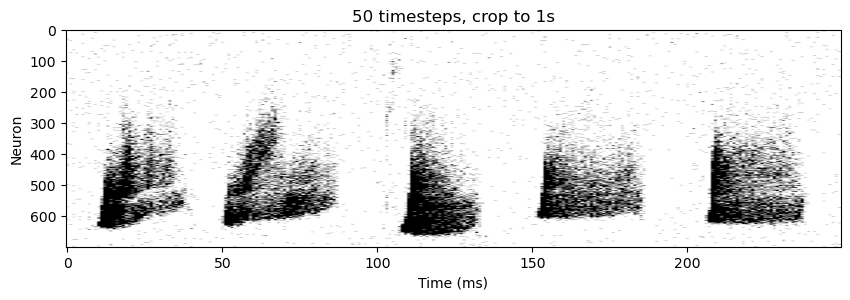

In [4]:
DL = DatasetLoader(dataset=dataset,
                  caching='memory',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time,
                  crop_to=1e6)

_, __, dataset_dict = DL.get_dataloaders()

subset = Subset(DL._dataset.test_dataset, sampled_indices)
dataloader = DataLoader(subset, batch_size=len(sampled_indices), shuffle=False)

snn = SNN(dataset_dict=dataset_dict, structure=(256, 2), connection_type='f',
    delay=None, delay_type='ho', tau_m = 'normal',
    win=total_time, loss_fn='mem_sum', batch_size=batch_size, device=device,
    debug=True)

_, __ = propagate_batch(snn, dataloader)
print_spike_info(snn, 'input')
plt.figure(figsize=(10,17))
plt.title("50 timesteps, crop to 1s")
plot_raster(snn, 'input', 5)
plt.gca().set_aspect(0.1)

[CropTime(min=0, max=500000.0), ToFrame(sensor_size=(700, 1, 1), time_window=None, event_count=None, n_time_bins=50, n_event_bins=None, overlap=0, include_incomplete=False)]

[INFO] Delays: tensor([0])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([0])

[INFO] Delays o: tensor([0])
500.0
Delta t: 10.0 ms
mean of normal: 0.4327521295671885
for input layer
total spikes: 113745.0
spikes per sample: 5687.25
spikes per timestep: 113.74 / 700
spikes per neuron: 8.12 / 50
spike density: 0.003249857142857143
[0, 1, 2, 3, 4]


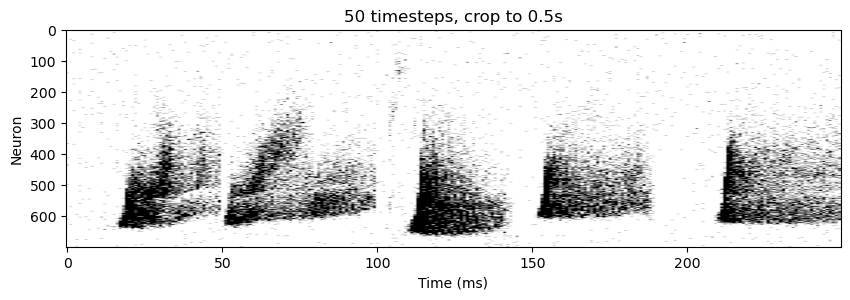

In [5]:
DL = DatasetLoader(dataset=dataset,
                  caching='memory',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time,
                  crop_to=5e5)

_, __, dataset_dict = DL.get_dataloaders()

subset = Subset(DL._dataset.test_dataset, sampled_indices)
dataloader = DataLoader(subset, batch_size=len(sampled_indices), shuffle=False)

snn = SNN(dataset_dict=dataset_dict, structure=(256, 2), connection_type='f',
    delay=None, delay_type='ho', tau_m = 'normal',
    win=total_time, loss_fn='mem_sum', batch_size=batch_size, device=device,
    debug=True)

_, __ = propagate_batch(snn, dataloader)
print_spike_info(snn, 'input')
plt.figure(figsize=(10,17))
plt.title("50 timesteps, crop to 0.5s")
plot_raster(snn, 'input', 5)
plt.gca().set_aspect(0.1)

[ToFrame(sensor_size=(700, 1, 1), time_window=None, event_count=None, n_time_bins=50, n_event_bins=None, overlap=0, include_incomplete=False)]

[INFO] Delays: tensor([0])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([0])

[INFO] Delays o: tensor([0])
1400.0
Delta t: 28.0 ms
mean of normal: -1.1168450460770727
for input layer
total spikes: 104600.0
spikes per sample: 5230.0
spikes per timestep: 104.6 / 700
spikes per neuron: 7.47 / 50
spike density: 0.0029885714285714285
[0, 1, 2, 3, 4]


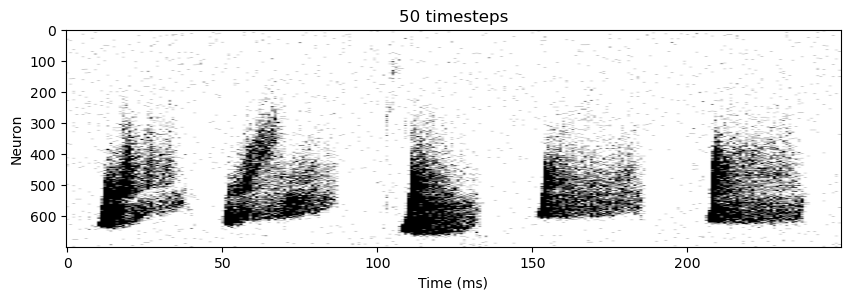

In [7]:
dataset = 'shd'
total_time = 50

# DATASET
DL = DatasetLoader(dataset=dataset,
                  caching='memory',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time)
_, __, dataset_dict = DL.get_dataloaders()

subset = Subset(DL._dataset.test_dataset, sampled_indices)
dataloader = DataLoader(subset, batch_size=len(sampled_indices), shuffle=False)

dataset_dict['time_ms'] = 1.4e3

snn = SNN(dataset_dict=dataset_dict, structure=(256, 2), connection_type='f',
    delay=None, delay_type='ho', tau_m = 'normal',
    win=total_time, loss_fn='mem_sum', batch_size=batch_size, device=device,
    debug=True)

_, __ = propagate_batch(snn, dataloader)
print_spike_info(snn, 'input')
plt.figure(figsize=(10,17))
plt.title("50 timesteps")
plot_raster(snn, 'input', 5)
plt.gca().set_aspect(0.1)

[CropTime(min=0, max=1000000.0), ToFrame(sensor_size=(700, 1, 1), time_window=None, event_count=None, n_time_bins=250, n_event_bins=None, overlap=0, include_incomplete=False)]

[INFO] Delays: tensor([0])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([0])

[INFO] Delays o: tensor([0])
1000.0
Delta t: 4.0 ms
mean of normal: 1.5077718009705197
for input layer
total spikes: 154035.0
spikes per sample: 7701.75
spikes per timestep: 30.81 / 700
spikes per neuron: 11.0 / 250
spike density: 0.00017604
[0, 1, 2, 3, 4]


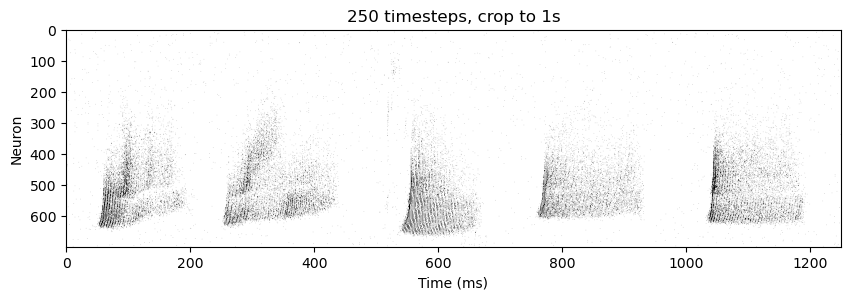

In [10]:
total_time = 250
DL = DatasetLoader(dataset=dataset,
                  caching='memory',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time,
                  crop_to=1e6)

_, __, dataset_dict = DL.get_dataloaders()

subset = Subset(DL._dataset.test_dataset, sampled_indices)
dataloader = DataLoader(subset, batch_size=len(sampled_indices), shuffle=False)

snn = SNN(dataset_dict=dataset_dict, structure=(256, 2), connection_type='f',
    delay=None, delay_type='ho', tau_m = 'normal',
    win=total_time, loss_fn='mem_sum', batch_size=batch_size, device=device,
    debug=True)

_, __ = propagate_batch(snn, dataloader)
print_spike_info(snn, 'input')
plt.figure(figsize=(10,17))
plt.title("250 timesteps, crop to 1s")
plot_raster(snn, 'input', 5)
plt.gca().set_aspect(0.5)
plt.show()

Testing random crops!

[CropTimeRandom(max_start=500000.0, duration=1000000.0), ToFrame(sensor_size=(700, 1, 1), time_window=None, event_count=None, n_time_bins=250, n_event_bins=None, overlap=0, include_incomplete=False)]

[INFO] Delays: tensor([0])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([0])

[INFO] Delays o: tensor([0])
1000.0
Delta t: 4.0 ms
mean of normal: 1.5077718009705197
for input layer
total spikes: 58483.0
spikes per sample: 2924.15
spikes per timestep: 11.7 / 700
spikes per neuron: 4.18 / 250
spike density: 6.683771428571429e-05
[0, 1, 2, 3, 4]


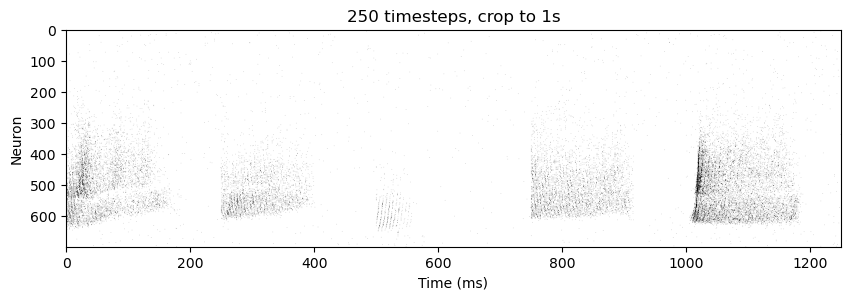

In [5]:
total_time = 250
DL = DatasetLoader(dataset=dataset,
                  caching='memory',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time,
                  random_crop_to=(5e5, 1e6))

_, __, dataset_dict = DL.get_dataloaders()

subset = Subset(DL._dataset.test_dataset, sampled_indices)
dataloader = DataLoader(subset, batch_size=len(sampled_indices), shuffle=False)

snn = SNN(dataset_dict=dataset_dict, structure=(256, 2), connection_type='f',
    delay=None, delay_type='ho', tau_m = 'normal',
    win=total_time, loss_fn='mem_sum', batch_size=batch_size, device=device,
    debug=True)

_, __ = propagate_batch(snn, dataloader)
print_spike_info(snn, 'input')
plt.figure(figsize=(10,17))
plt.title("250 timesteps, crop to 1s")
plot_raster(snn, 'input', 5)
plt.gca().set_aspect(0.5)
plt.show()

Check that start times are truly random (don't repeat for every batch)
(to run this, add a print in RandomCropTime definition)

In [8]:
total_time = 250
batch_size = 1024
DL = DatasetLoader(dataset=dataset,
                  caching='memory',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time,
                  random_crop_to=(5e4, 1e6))

train_loader, test_loader, dataset_dict = DL.get_dataloaders()

for x, y in test_loader:
    print('--------------------new batch---------------------')

[CropTimeRandom(max_start=50000.0, duration=1000000.0), ToFrame(sensor_size=(700, 1, 1), time_window=None, event_count=None, n_time_bins=250, n_event_bins=None, overlap=0, include_incomplete=False)]
12819
9369
9283
30573
13171
30933
5774
6519
10983
30932
30798
18133
14939
781
49050
27624
6823
18489
39961
29118
34881
16280
22263
13565
20354
42951
25643
23648
41971
18658
21253
48563
26390
23128
13489
38314
32658
6852
29450
2551
6411
49159
33243
21800
10403
7239
6710
21384
21038
40846
22447
2285
37991
13521
47657
6971
29139
19909
11531
14721
19206
37711
6530
11116
258
282
13937
1898
4135
6629
43936
19584
23551
33380
46971
17071
20074
25188
2307
39901
11205
5906
2591
15149
44918
39951
25150
31852
42870
49821
1283
33691
1125
1529
26170
8438
20095
16154
8004
9752
43360
26819
36632
26515
24217
23172
32994
15036
11739
32220
49416
9587
44517
30129
645
30930
16299
30090
21953
46443
26475
18888
43732
16087
46305
46037
9346
587
12763
41945
4079
36116
20215
25817
24765
30112
25556
18099
43553
45096